In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

In [1]:
# Data processing
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset
from sklearn import datasets
# Dimensionality reduction
from sklearn.decomposition import PCA
# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

dataset = pd.read_csv("data/tracks_with_genres_&_language.csv")
df = pd.DataFrame(dataset)
df.info()
df_features = df[['energy', 'valence', 'acousticness']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186011 entries, 0 to 186010
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                186011 non-null  object 
 1   name              186011 non-null  object 
 2   popularity        186011 non-null  int64  
 3   duration_ms       186011 non-null  int64  
 4   explicit          186011 non-null  int64  
 5   id_artists        186011 non-null  object 
 6   release_date      186011 non-null  object 
 7   danceability      186011 non-null  float64
 8   energy            186011 non-null  float64
 9   key               186011 non-null  int64  
 10  loudness          186011 non-null  float64
 11  mode              186011 non-null  int64  
 12  speechiness       186011 non-null  float64
 13  acousticness      186011 non-null  float64
 14  instrumentalness  186011 non-null  float64
 15  liveness          186011 non-null  float64
 16  valence           18

In [ ]:
df['acousticness'].value_counts()

In [ ]:
df['valence'].value_counts()

In [ ]:
df['energy'].value_counts()

In [12]:
from sklearn.model_selection import train_test_split

# Assuming df_features contains your features
X = df_features

# Splitting the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# K Means Clustering

In [13]:
# Kmeans model
kmeans = KMeans(n_clusters = 3, random_state = 20, n_init = 20, tol = 0.0001)
# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X_test)
#Save centroids
centroids = kmeans.cluster_centers_
# Save the predictions as a column
X_test['y_kmeans']=y_kmeans
# Check the distribution
X_test['y_kmeans'].value_counts()

y_kmeans
2    15139
1    12499
0     9565
Name: count, dtype: int64

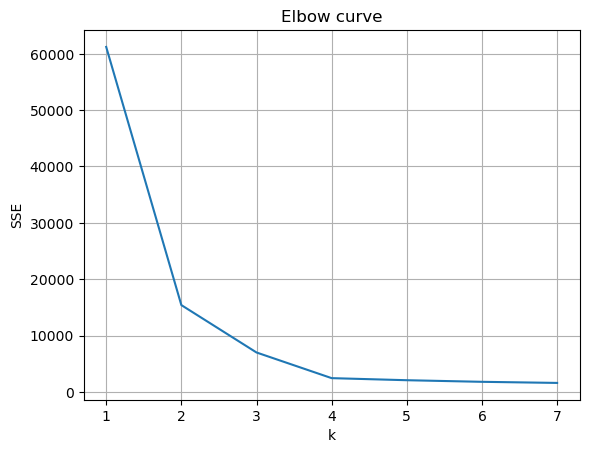

In [6]:
SSE = []
for i in range(1,8):
    model_i = KMeans(n_clusters = i, max_iter=300, tol=0.0001, n_init=20, random_state=999)
    model_i.fit(X_test)
    SSE.append(model_i.inertia_)

# Plot the elbow curve
k = (range(1,8))
plt.plot(k, SSE)

# Add more information to plot.
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

## visualising clusters

#### using matplotlib

c:\Users\yukwa\is217anaconda3\anaconda3\envs\is217_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


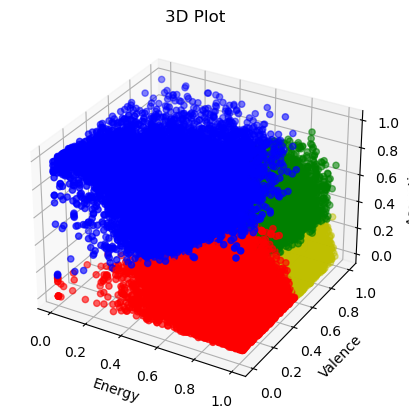

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
cluster_labels = X_test['y_kmeans']  # Random cluster labels for demonstration

colors = ['r', 'g', 'b', 'y']  # Red, Green, Blue for the three clusters
cluster_colors = [colors[label] for label in cluster_labels]


# Plot points
ax.scatter(X_test['energy'], X_test['valence'], X_test['acousticness'], c=cluster_colors, marker='o') # Each feature respectively


# Set labels and title
ax.set_xlabel('Energy')
ax.set_ylabel('Valence')
ax.set_zlabel('Acousticness')
ax.set_title('3D Plot')

# Conduct K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_test[['energy', 'valence', 'acousticness']])

# # Get cluster centers
# centers = kmeans.cluster_centers_

# # Plot cluster centers
# ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='r', marker='X', s=200, label='Centroids')

# plt.legend()
plt.show()


#### using PCA

In [9]:
# PCA with 2 components
pca=PCA(n_components=2).fit_transform(X)
# Create columns for the 2 PCA components
df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

# Take a look at the data
df.head()

,id,name,popularity,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,year,artists_count,artist_1,artist_2,artist_3,artist_4,genres,language,PCA1,PCA2
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,...,2008,1,Gerry & The Pacemakers,NaN,NaN,NaN,"['adult standards', 'bubblegum pop', 'merseybe...",en,0.364691,-0.189125
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,...,2020,1,The Toys,NaN,NaN,NaN,[],en,-0.119155,0.336489
2,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,...,2008,1,Gerry & The Pacemakers,NaN,NaN,NaN,"['adult standards', 'bubblegum pop', 'merseybe...",en,0.099099,0.029499
3,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,1,...,2008,1,Gerry & The Pacemakers,NaN,NaN,NaN,"['adult standards', 'bubblegum pop', 'merseybe...",en,0.260194,-0.007963
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,7,...,2018,1,Frank Sinatra,NaN,NaN,NaN,"['easy listening', 'adult standards', 'lounge']",en,0.793771,-0.026722


In [ ]:
#colour
palette = sns.color_palette("husl", 3)
# Visualization using PCA
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(20, 12))

# Scatter plot for ground truth
sns.scatterplot(x='PCA1', y='PCA2', data=X_test, hue='valence', palette=palette, ax=axs[0]).set(title='Ground Truth')

# Scatter plot for KMeans
sns.scatterplot(x='PCA1', y='PCA2', data=X_test, hue='y_kmeans', palette=palette, ax=axs[1]).set(title='KMeans')

# Scatter plot for centroids
sns.scatterplot(x=centroids_pca[:, 0], y=centroids_pca[:, 1], hue=[1, 2, 0], palette=palette, marker='X', s=200, ax=axs[1])


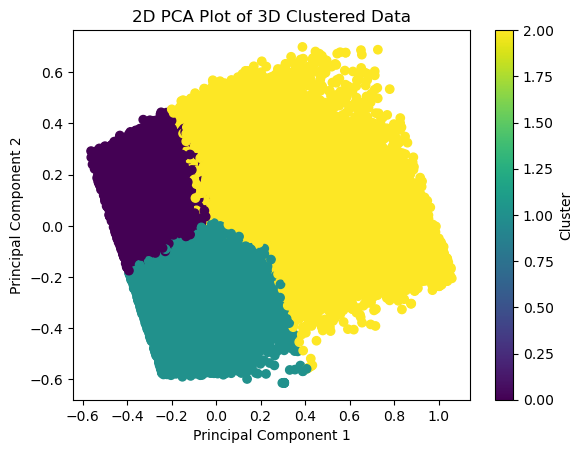

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your 3D clustered data stored in a variable named 'clustered_data'

# Step 1: Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_test[['energy', 'valence', 'acousticness']])

# Sample cluster labels
cluster_labels = X_test['y_kmeans']  # Random cluster labels for demonstration

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink']
cluster_colors = [colors[label] for label in cluster_labels]

# Step 2: Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('2D PCA Plot of 3D Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

#### using topographic map

In [ ]:
# Create a jointplot, which is like a topographic map that shows height on a 2-D map.
# The x and y axes are 'time' and 'sections' respectively,
# and the height of the map represents the frequency.
sns.jointplot(x='valence', y='energy', z='acousticness', data=df, kind="kde",height=7, space=0)

#### using heatmap

In [ ]:
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(df.T,  linewidths=.5, cmap="YlGnBu")
# .T means transpose -> row will become column and column will become row

<Axes: >

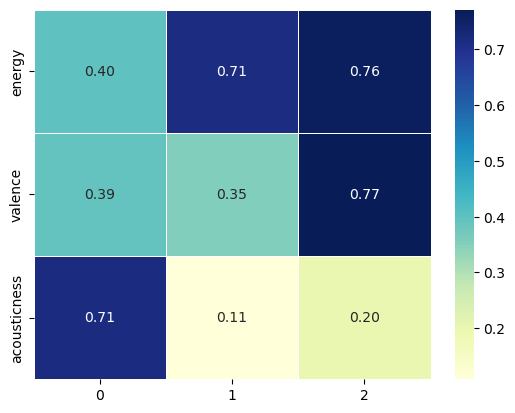

In [14]:
clust_means_df = pd.DataFrame(kmeans.cluster_centers_, columns=['energy', 'valence', 'acousticness'])
sns.heatmap(clust_means_df.T, linewidths=.5, cmap="YlGnBu", annot=True, fmt=".2f")

<Axes: >

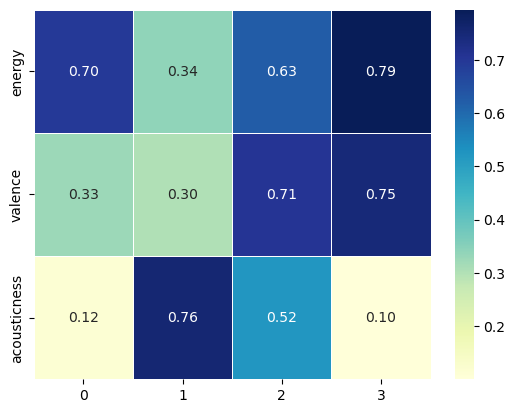

In [7]:
clust_means_df = pd.DataFrame(kmeans.cluster_centers_, columns=['energy', 'valence', 'acousticness'])
sns.heatmap(clust_means_df.T, linewidths=.5, cmap="YlGnBu", annot=True, fmt=".2f")

Insights:
- Cluster 0: Medium Energy, Medium Valence, Higher Acousticness.
- Cluster 1: Higher Energy, Lower Valence, Very Low Acousticness.
- Cluster 2: High Energy, High Valence, Low Acousticness.

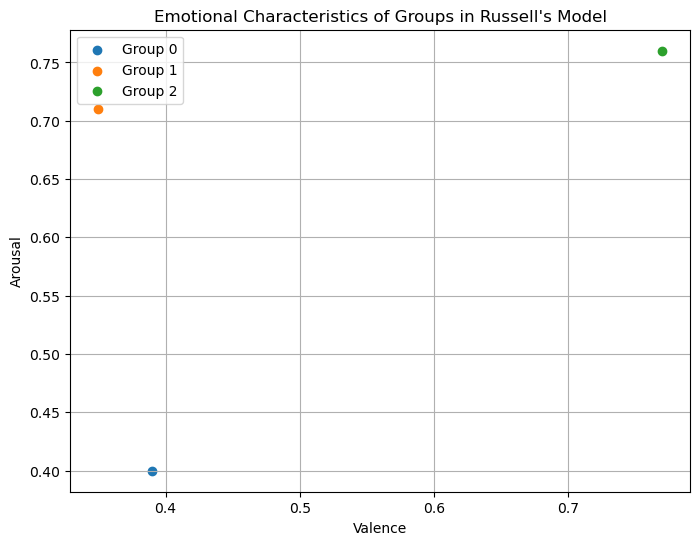

In [15]:
import matplotlib.pyplot as plt

# Define the characteristics of each group
groups = {
    'Group 0': {'valence': 0.39, 'arousal': 0.4},
    'Group 1': {'valence': 0.35, 'arousal': 0.71},
    'Group 2': {'valence': 0.77, 'arousal': 0.76},
}

# Create a scatter plot
plt.figure(figsize=(8, 6))
for group, data in groups.items():
    plt.scatter(data['valence'], data['arousal'], label=group)

# Add labels and title
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Emotional Characteristics of Groups in Russell\'s Model')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

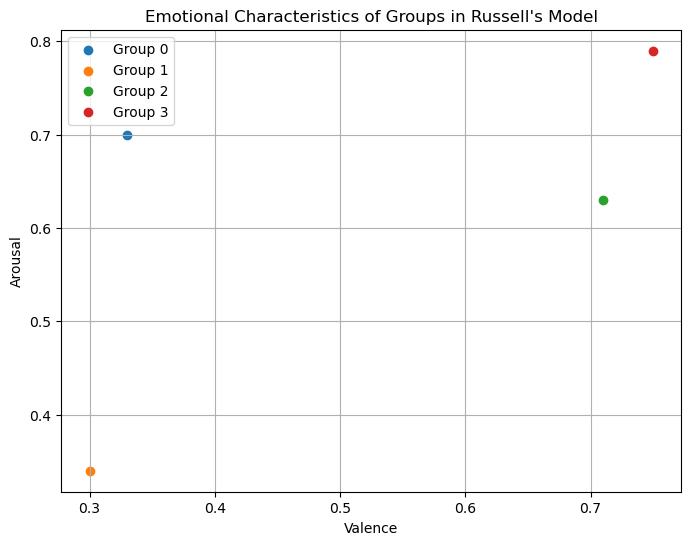

In [16]:
import matplotlib.pyplot as plt

# Define the characteristics of each group
groups = {
    'Group 0': {'valence': 0.33, 'arousal': 0.7},
    'Group 1': {'valence': 0.30, 'arousal': 0.34},
    'Group 2': {'valence': 0.71, 'arousal': 0.63},
    'Group 3': {'valence': 0.75, 'arousal': 0.79}
}

# Create a scatter plot
plt.figure(figsize=(8, 6))
for group, data in groups.items():
    plt.scatter(data['valence'], data['arousal'], label=group)

# Add labels and title
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Emotional Characteristics of Groups in Russell\'s Model')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# DBSCAN

In [10]:
# Fit the DBSCAN model
#epsilon: radius of the circle to be created around each data point to check the density
#minPoints: minimum number of data points required inside that circle for that data point to be classified as a Core point
dbscan = DBSCAN(eps=0.05111209400912851, min_samples=50)
# Fit and predict on the data
y_dbscan = dbscan.fit_predict(X_test[['energy', 'valence', 'acousticness']])
# Save the prediction as a column
X_test['y_dbscan'] = y_dbscan
# Check the distribution
X_test['y_dbscan'].value_counts()

y_dbscan
 0    25600
-1    11324
 1       95
 5       54
 2       46
 3       45
 4       39
Name: count, dtype: int64

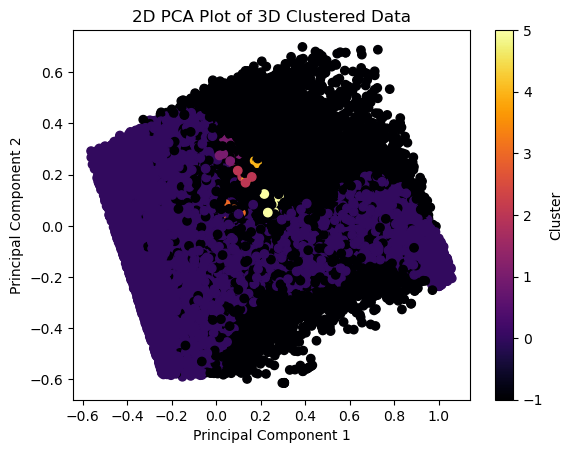

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your 3D clustered data stored in a variable named 'clustered_data'

# Step 1: Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_test[['energy', 'valence', 'acousticness']])

# Sample cluster labels
cluster_labels = X_test['y_dbscan']  # Random cluster labels for demonstration

colors = ['blue', 'green', 'red', 'cyan', 'bluie', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink']
cluster_colors = [colors[label] for label in cluster_labels]

# Step 2: Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='inferno')
plt.title('2D PCA Plot of 3D Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Text(0.5, 0.92, '3D Plot')

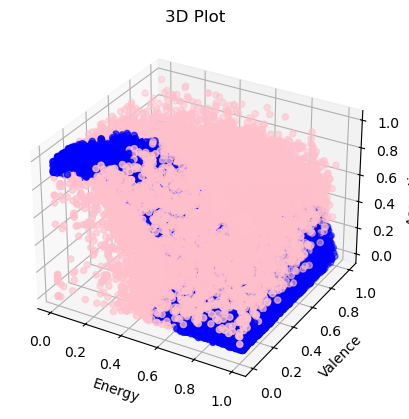

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Sample cluster labels
cluster_labels = X_test['y_dbscan']  # Random cluster labels for demonstration

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink']
cluster_colors = [colors[label] for label in cluster_labels]

# Plot points
ax.scatter(X_test['energy'], X_test['valence'], X_test['acousticness'], c=cluster_colors, marker='o') # Each feature respectively

# Set labels and title
ax.set_xlabel('Energy')
ax.set_ylabel('Valence')
ax.set_zlabel('Acousticness')
ax.set_title('3D Plot')

In [ ]:
# PCA with 2 components
pca=PCA(n_components=2).fit_transform(X_test)
# Create columns for the 2 PCA components
X_test['PCA1'] = pca[:, 0]
X_test['PCA2'] = pca[:, 1]

# Take a look at the data
X_test.head()

In [ ]:
# Check label mapping
X_test.groupby(['energy', 'y_dbscan']).size().reset_index(name='counts')
# Rename labels
X_test['y_dbscan'] = X_test['y_dbscan'].map({0: 0, -1: 2, 1: 1})

In [ ]:
# Visualization using PCA
palette = sns.color_palette("husl", 3)
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(20,12))
sns.scatterplot(x='PCA1', y='PCA2', data=X_test, hue='energy', palette=palette, ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='PCA1', y='PCA2', data=X_test, hue='y_kmeans', palette=palette, ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='PCA1', y='PCA2', data=X_test, hue='y_dbscan', palette=palette, ax=axs[2]).set(title='DBSCAN')

# Weighting Comparison

### K-means

In [19]:
weighted_df = X_test[['energy', 'valence', 'acousticness']]
weighted_df[['wgt_energy', 'wgt_valence', 'wgt_acousticness']] = weighted_df[['energy', 'valence', 'acousticness']] * 4

C:\Users\Kwang Zhe\AppData\Local\Temp\ipykernel_25460\2415264534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_df[['wgt_energy', 'wgt_valence', 'wgt_acousticness']] = weighted_df[['energy', 'valence', 'acousticness']] * 4


In [20]:
weighted_df.head()

,energy,valence,acousticness,wgt_energy,wgt_valence,wgt_acousticness
98886,0.398,0.381,0.858000,1.592,1.524,3.432000
15066,0.993,0.221,0.001270,3.972,0.884,0.005080
148475,0.720,0.567,0.254000,2.880,2.268,1.016000
160818,0.653,0.633,0.475000,2.612,2.532,1.900000
17715,0.795,0.339,0.000652,3.180,1.356,0.002608


In [22]:
weighted_energy = weighted_df[['wgt_energy', 'valence', 'acousticness']]
weighted_valence = weighted_df[['energy', 'wgt_valence', 'acousticness']]
weighted_acousticness = weighted_df[['energy', 'valence', 'wgt_acousticness']]

In [23]:
model_energy = KMeans(n_clusters = 3, random_state = 20, n_init = 20, tol = 0.0001)
model_valence = KMeans(n_clusters = 3, random_state = 20, n_init = 20, tol = 0.0001)
model_acousticness = KMeans(n_clusters = 3, random_state = 20, n_init = 20, tol = 0.0001)

model_energy.fit(weighted_energy)
model_valence.fit(weighted_valence)
model_acousticness.fit(weighted_acousticness)

KMeans(n_clusters=3, n_init=20, random_state=20)

In [24]:
clust_means_energy = pd.DataFrame(model_energy.cluster_centers_, columns=['energy', 'valence', 'acousticness'])
clust_means_valence = pd.DataFrame(model_valence.cluster_centers_, columns=['energy', 'valence', 'acousticness'])
clust_means_acousticness = pd.DataFrame(model_acousticness.cluster_centers_, columns=['energy', 'valence', 'acousticness'])

<Axes: >

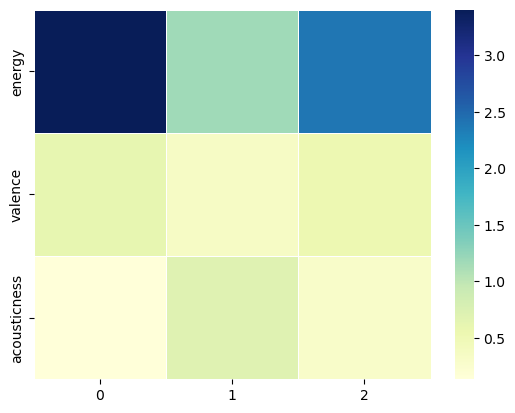

In [25]:
sns.heatmap(clust_means_energy.T, linewidths=.5, cmap="YlGnBu")

<Axes: >

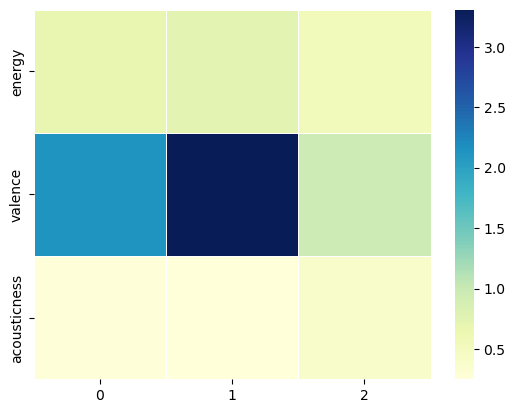

In [26]:
sns.heatmap(clust_means_valence.T, linewidths=.5, cmap="YlGnBu")

<Axes: >

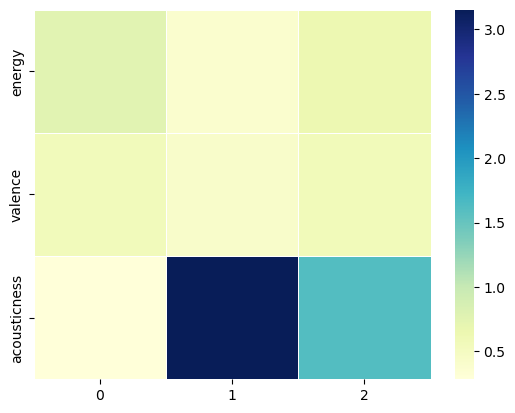

In [28]:
sns.heatmap(clust_means_acousticness.T, linewidths=.5, cmap="YlGnBu")

Insights:
- Cluster 0: High Energy, Medium Valence, Low Acousticness.
- Cluster 1: Lower Energy, High Valence, High Acousticness.
- Cluster 2: Higher Energy, Low Valence, Medium Acousticness.

But the data here is compromised. And should be used.